In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import csv

In [25]:
final_df = pd.read_csv('final_df.csv')

In [ ]:
final_df.head()

In [ ]:
final_df.isnull().sum().sum()

# Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

## Split the data into training and testing sets and validation set

In [ ]:
# Assign the data to independent and dependent variables
X = final_df.drop(['TARGET'],axis=1)
y = final_df['TARGET']

In [ ]:
# Split the data into training and testing sets and validation set
X_reminder,X_test,y_reminder,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
# Split the data into training sets and validation set
X_train,X_val,y_train,y_val = train_test_split(X_reminder,y_reminder,test_size=0.2,random_state=42,stratify=y_reminder)

In [ ]:
# Check the shape of the datasets
X_train.shape,X_val.shape,X_test.shape

## Baseline Model - Decision Tree

In [ ]:
# Create the StandardScaler() object to standardize the data
scaler = StandardScaler()
# Create the PCA object
pca = PCA()
# Create the DecisionTreeClassifier object
dt = DecisionTreeClassifier()

In [ ]:
# Create the pipeline object
pipe = Pipeline(steps=[('scaler',scaler),('pca',pca),('dt',dt)])

In [ ]:
# Set the number of components to be used in the PCA
n_components = np.arange(2,20,2)
# Set the max_depth to be used in the DecisionTreeClassifier
max_depth = np.arange(2,20,2)
params = {'pca__n_components':n_components,'dt__max_depth':max_depth}

In [ ]:
# Create the GridSearchCV object and set the parameters to be used in the GridSearchCV object and cross-validation to be used in the GridSearchCV object
grid = GridSearchCV(pipe,params,cv=5,scoring= 'roc_auc',verbose = 10,n_jobs=-1) #n_jobs=-1 means it will use all the available cores in the computer

In [ ]:
# Fit the GridSearchCV object to the training data
grid.fit(X_train,y_train) #verbose=1 to show the progress of the GridSearchCV object

In [ ]:
# Get the best estimator from the GridSearchCV object
best_est = grid.best_estimator_
best_est

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(y_train)
plt.show()

In [ ]:
pipe.set_params(pca__n_components=6)
pipe.set_params(dt__max_depth=6)

In [ ]:
pipe.fit(X_test,y_test)
    

In [ ]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

In [43]:
# Get the best estimator from the GridSearchCV object
best_est = grid.best_estimator_
best_est

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('dt', DecisionTreeClassifier(max_depth=6))])

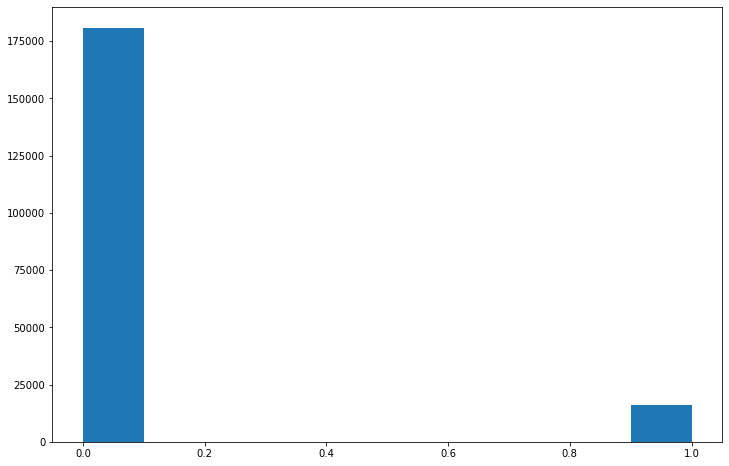

In [44]:
plt.figure(figsize=(12,8))
plt.hist(y_train)
plt.show()

In [46]:
pipe.set_params(pca__n_components=6)
pipe.set_params(dt__max_depth=6)

[CV 3/5; 2/25] START dt__max_depth=2, pca__n_components=6.......................
[CV 3/5; 2/25] END dt__max_depth=2, pca__n_components=6;, score=0.684 total time=   3.3s
[CV 3/5; 5/25] START dt__max_depth=2, pca__n_components=18......................
[CV 3/5; 5/25] END dt__max_depth=2, pca__n_components=18;, score=0.684 total time=   5.2s
[CV 3/5; 10/25] START dt__max_depth=6, pca__n_components=18.....................
[CV 3/5; 10/25] END dt__max_depth=6, pca__n_components=18;, score=0.707 total time=   5.9s
[CV 3/5; 14/25] START dt__max_depth=10, pca__n_components=14....................
[CV 3/5; 14/25] END dt__max_depth=10, pca__n_components=14;, score=0.693 total time=   5.7s
[CV 4/5; 17/25] START dt__max_depth=14, pca__n_components=6.....................
[CV 4/5; 17/25] END dt__max_depth=14, pca__n_components=6;, score=0.639 total time=   4.0s
[CV 4/5; 20/25] START dt__max_depth=14, pca__n_components=18....................
[CV 4/5; 20/25] END dt__max_depth=14, pca__n_components=18;, 

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('dt', DecisionTreeClassifier(max_depth=6))])

[CV 2/5; 3/25] START dt__max_depth=2, pca__n_components=10......................
[CV 2/5; 3/25] END dt__max_depth=2, pca__n_components=10;, score=0.680 total time=   3.5s
[CV 2/5; 6/25] START dt__max_depth=6, pca__n_components=2.......................
[CV 2/5; 6/25] END dt__max_depth=6, pca__n_components=2;, score=0.691 total time=   2.9s
[CV 4/5; 7/25] START dt__max_depth=6, pca__n_components=6.......................
[CV 4/5; 7/25] END dt__max_depth=6, pca__n_components=6;, score=0.719 total time=   3.6s
[CV 5/5; 10/25] START dt__max_depth=6, pca__n_components=18.....................
[CV 5/5; 10/25] END dt__max_depth=6, pca__n_components=18;, score=0.717 total time=   5.6s
[CV 1/5; 15/25] START dt__max_depth=10, pca__n_components=18....................
[CV 1/5; 15/25] END dt__max_depth=10, pca__n_components=18;, score=0.678 total time=   6.8s
[CV 2/5; 19/25] START dt__max_depth=14, pca__n_components=14....................
[CV 2/5; 19/25] END dt__max_depth=14, pca__n_components=14;, sc

In [48]:
pipe.fit(X_test,y_test)
    

0.9200851990959791

In [52]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.62      0.03      0.05      4965

    accuracy                           0.92     61503
   macro avg       0.77      0.51      0.50     61503
weighted avg       0.90      0.92      0.88     61503



2## Ensemble Methods

### Bagging Method

In [18]:
# Create the BaggingClassifier object
rf = RandomForestClassifier()
# Create the pipeline object
pipe = Pipeline(steps=[('scaler',scaler),('rf',rf)])
params = {'rf__n_estimators':np.arange(2,20,4)}
#
grid = GridSearchCV(pipe,params,cv=5,scoring= 'roc_auc',verbose = 5,n_jobs=-1) #n_jobs=-1 means it will use all the available cores in the computer
grid.fit(X_train,y_train) #verbose=1 to show the progress of the GridSearchCV object

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__n_estimators': array([ 2,  6, 10, 14, 18])},
             scoring='roc_auc', verbose=5)

In [19]:
best_est = grid.best_estimator_
best_est

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(n_estimators=18))])

In [20]:
# Create the BaggingClassifier object
rf = RandomForestClassifier(n_estimators=18)
# Create the pipeline object
pipe = Pipeline(steps=[('scaler',scaler),('rf',rf)])

In [21]:
pipe.fit(X_train,y_train)
pipe.score(X_train,y_train)# rbose=1 to show the progress of the GridSearchCV object

0.9928272973687043

In [22]:
pipe.score(X_val,y_val)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
1print(classification_report(y_test,y_pred))